In [605]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

### (a)  Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [292]:
names = ['id','class','mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
csv_data = pd.read_csv(url, names=names)
csv_data

,id,class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

### i).  Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [185]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,auc

mean_accuracy_train = []
mean_accuracy_test = []
mean_precision_train = []
mean_precision_test = []
mean_recall_train = []
mean_recall_test = []
mean_Fscore_train = []
mean_Fscore_test = []
mean_AUC_train = []
mean_AUC_test = []

for i in range(1,31):
    test_data = pd.DataFrame()
    test_data_B = csv_data.loc[csv_data['class'] == 'B'].sample(frac=0.20)
    test_data_M = csv_data.loc[csv_data['class'] == 'M'].sample(frac=0.20)
    test_data = pd.concat([test_data, test_data_B, test_data_M], names=names)

    training_data = csv_data.loc[~csv_data.index.isin(test_data.index), :]

    training_data.reset_index(drop=True,inplace=True)
    test_data.reset_index(drop=True,inplace=True)

    y_training = training_data[["class"]]
    x_training = training_data.drop(["class", "id"],axis=1)

    y_test = test_data[["class"]]
    x_test = test_data.drop(["class", "id"],axis=1)

    x_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
           'mean concave points', 'mean symmetry', 'mean fractal dimension',
           'radius error', 'texture error', 'perimeter error', 'area error',
           'smoothness error', 'compactness error', 'concavity error',
           'concave points error', 'symmetry error', 'fractal dimension error',
           'worst radius', 'worst texture', 'worst perimeter', 'worst area',
           'worst smoothness', 'worst compactness', 'worst concavity',
           'worst concave points', 'worst symmetry', 'worst fractal dimension']
    x_training_normalized = pd.DataFrame(preprocessing.normalize(x_training), columns=x_names)
    x_test_normalized = pd.DataFrame(preprocessing.normalize(x_test), columns=x_names)


    c_r = np.logspace(-4,4,9)

    param_grid = dict(C=c_r)

    kf = KFold(n_splits=5)

    grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=param_grid, cv=kf)
    grid_search.fit(x_training_normalized,y_training)

    train_pred = grid_search.predict(x_training_normalized)
    test_pred = grid_search.predict(x_test_normalized)

    # Accuracy
    mean_accuracy_train.append(accuracy_score(y_training,train_pred))
    mean_accuracy_test.append(accuracy_score(y_test,test_pred))

    #Precision
    mean_precision_train.append(precision_score(y_training,train_pred,pos_label='B'))
    mean_precision_test.append(precision_score(y_test,test_pred,pos_label='B'))

    #Recall
    mean_recall_train.append(recall_score(y_training,train_pred,pos_label='B'))
    mean_recall_test.append(recall_score(y_test,test_pred,pos_label='B'))

    #F-Score 
    mean_Fscore_train.append(f1_score(y_training,train_pred,pos_label='B'))
    mean_Fscore_test.append(f1_score(y_test,test_pred,pos_label='B'))

    #AUC
    decis_score_train = grid_search.decision_function(x_training_normalized)
    mean_AUC_train.append(roc_auc_score(y_training, decis_score_train))

    decis_score_test = grid_search.decision_function(x_test_normalized)
    mean_AUC_test.append(roc_auc_score(y_test, decis_score_test))

In [186]:
print("AVG TRAIN ACCURACY = " + str(np.mean(mean_accuracy_train)))
print("AVG TEST ACCURACY = " + str(np.mean(mean_accuracy_test)))
print("AVG TRAIN PRECISION = " + str(np.mean(mean_precision_train)))
print("AVG TEST PRECISION = " + str(np.mean(mean_precision_test)))
print("AVG TRAIN RECALL = " + str(np.mean(mean_recall_train)))
print("AVG TEST RECALL = " + str(np.mean(mean_recall_test)))
print("AVG TRAIN F-SCORE = " + str(np.mean(mean_Fscore_train)))
print("AVG TEST F-SCORE = " + str(np.mean(mean_Fscore_test)))
print("AVG TRAIN AUC = " + str(np.mean(mean_AUC_train)))
print("AVG TEST AUC = " + str(np.mean(mean_AUC_test)))

AVG TRAIN ACCURACY = 0.9827485380116959
AVG TEST ACCURACY = 0.6283185840707967
AVG TRAIN PRECISION = 0.9808789936519507
AVG TEST PRECISION = 0.6283185840707967
AVG TRAIN RECALL = 0.9918414918414921
AVG TEST RECALL = 1.0
AVG TRAIN F-SCORE = 0.9863250084359039
AVG TEST F-SCORE = 0.7717391304347824
AVG TRAIN AUC = 0.9984252022487315
AVG TEST AUC = 0.8837692823608317


In [187]:
confusion_matrix(y_training,train_pred)

array([[285,   1],
       [  4, 166]])

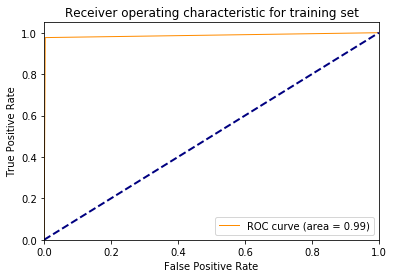

In [188]:
from sklearn.preprocessing import label_binarize

y_training = label_binarize(y_training, classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
train_pred = label_binarize(train_pred, classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

lw=2
fpr, tpr, thresholds = roc_curve(y_training, train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training set')
plt.legend(loc="lower right")
plt.show()

In [189]:
confusion_matrix(y_test,test_pred)

array([[71,  0],
       [42,  0]])

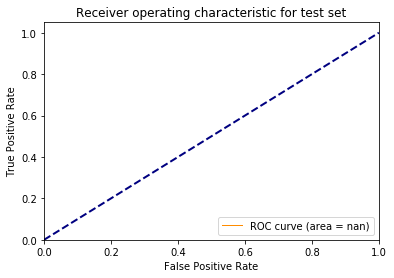

In [714]:
from sklearn.preprocessing import label_binarize

y_test = label_binarize(y_test, classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
test_pred = label_binarize(test_pred, classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

lw=2
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.show()

### ii). Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly. 
### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.
### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [297]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

mean_accuracy_train = []
mean_accuracy_test = []
mean_precision_train = []
mean_precision_test = []
mean_recall_train = []
mean_recall_test = []
mean_Fscore_train = []
mean_Fscore_test = []
mean_AUC_train = []
mean_AUC_test = []

for i in range(1,31):
    test_data = pd.DataFrame()
    test_data_B = csv_data.loc[csv_data['class'] == 'B'].sample(frac=0.20)
    test_data_M = csv_data.loc[csv_data['class'] == 'M'].sample(frac=0.20)
    test_data = pd.concat([test_data, test_data_B, test_data_M], names=names)

    training_data = csv_data.loc[~csv_data.index.isin(test_data.index), :]

    training_data.reset_index(drop=True,inplace=True)
    test_data.reset_index(drop=True,inplace=True)

    test_data = test_data.drop(['id'], axis=1)
    training_data = training_data.drop(['id'], axis=1)


    y_test = test_data[["class"]]
    x_test = test_data.drop(["class"],axis=1)

    label_train_data = pd.DataFrame()
    label_train_data_B = training_data.loc[csv_data['class'] == 'B'].sample(frac=0.50)
    label_train_data_M = training_data.loc[csv_data['class'] == 'M'].sample(frac=0.50)
    label_train_data = pd.concat([label_train_data, label_train_data_B, label_train_data_M], names=names)


    unlabelled = training_data.loc[~training_data.index.isin(label_train_data.index), :]
    unlabelled.drop(["class"],axis=1,inplace=True)


    while len(unlabelled) > 0:
        x_label_train_data = label_train_data.drop(["class"],axis=1)
        y_label_train_data = label_train_data[["class"]]

        x_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
               'mean concave points', 'mean symmetry', 'mean fractal dimension',
               'radius error', 'texture error', 'perimeter error', 'area error',
               'smoothness error', 'compactness error', 'concavity error',
               'concave points error', 'symmetry error', 'fractal dimension error',
               'worst radius', 'worst texture', 'worst perimeter', 'worst area',
               'worst smoothness', 'worst compactness', 'worst concavity',
               'worst concave points', 'worst symmetry', 'worst fractal dimension']

        x_label_train_data_normalized = pd.DataFrame(preprocessing.normalize(x_label_train_data), columns=x_names)

        c_r = np.logspace(-4,4,9)

        param_grid = dict(C=c_r)

        kf = KFold(n_splits=5)

        grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=param_grid, cv=kf)
        grid_search.fit(x_label_train_data_normalized,y_label_train_data)

        y= grid_search.decision_function(unlabelled)
        y=abs(y)
        x_loc=y.argsort()[::-1][:1]

        data_to_label = unlabelled.iloc[x_loc]
        unlabelled = unlabelled.loc[~unlabelled.index.isin(data_to_label.index), :]


        pred_val = grid_search.predict(data_to_label)

        data_to_label["class"] = pred_val[0]

        label_train_data = pd.concat([label_train_data,data_to_label])



    x_label_train_data = label_train_data.drop(["class"],axis=1)
    y_label_train_data = label_train_data[["class"]]

    x_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

    x_label_train_data_normalized = pd.DataFrame(preprocessing.normalize(x_label_train_data), columns=x_names)

    c_r = np.logspace(-4,4,9)

    param_grid = dict(C=c_r)

    kf = KFold(n_splits=5)

    grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=param_grid, cv=kf)
    grid_search.fit(x_label_train_data_normalized,y_label_train_data)


    x_test_normalized = pd.DataFrame(preprocessing.normalize(x_test), columns=x_names)


    train_pred = grid_search.predict(x_label_train_data_normalized)
    test_pred = grid_search.predict(x_test_normalized)

    # Accuracy
    mean_accuracy_train.append(accuracy_score(y_label_train_data,train_pred))
    mean_accuracy_test.append(accuracy_score(y_test,test_pred))

    #Precision
    mean_precision_train.append(precision_score(y_label_train_data,train_pred,pos_label='B'))
    mean_precision_test.append(precision_score(y_test,test_pred,pos_label='B'))

    #Recall
    mean_recall_train.append(recall_score(y_label_train_data,train_pred,pos_label='B'))
    mean_recall_test.append(recall_score(y_test,test_pred,pos_label='B'))

    #F-Score 
    mean_Fscore_train.append(f1_score(y_label_train_data,train_pred,pos_label='B'))
    mean_Fscore_test.append(f1_score(y_test,test_pred,pos_label='B'))

    #AUC
    decis_score_train = grid_search.decision_function(x_label_train_data_normalized)
    mean_AUC_train.append(roc_auc_score(y_label_train_data, decis_score_train))

    decis_score_test = grid_search.decision_function(x_test_normalized)
    mean_AUC_test.append(roc_auc_score(y_test, decis_score_test))

In [298]:
print("AVG TRAIN ACCURACY = " + str(np.mean(mean_accuracy_train)))
print("AVG TEST ACCURACY = " + str(np.mean(mean_accuracy_test)))
print("AVG TRAIN PRECISION = " + str(np.mean(mean_precision_train)))
print("AVG TEST PRECISION = " + str(np.mean(mean_precision_test)))
print("AVG TRAIN RECALL = " + str(np.mean(mean_recall_train)))
print("AVG TEST RECALL = " + str(np.mean(mean_recall_test)))
print("AVG TRAIN F-SCORE = " + str(np.mean(mean_Fscore_train)))
print("AVG TEST F-SCORE = " + str(np.mean(mean_Fscore_test)))
print("AVG TRAIN AUC = " + str(np.mean(mean_AUC_train)))
print("AVG TEST AUC = " + str(np.mean(mean_AUC_test)))

AVG TRAIN ACCURACY = 0.8172514619883043
AVG TEST ACCURACY = 0.8185840707964601
AVG TRAIN PRECISION = 0.7872782751020238
AVG TEST PRECISION = 0.9349504556593472
AVG TRAIN RECALL = 0.8508350953795395
AVG TEST RECALL = 0.7962441314553991
AVG TRAIN F-SCORE = 0.8168425378025446
AVG TEST F-SCORE = 0.8466665561569015
AVG TRAIN AUC = 0.8582471927267513
AVG TEST AUC = 0.9241225128549072


In [299]:
confusion_matrix(y_label_train_data,train_pred)

array([[143,  55],
       [ 60, 198]])

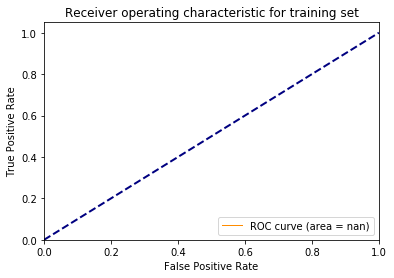

In [481]:
from sklearn.preprocessing import label_binarize

y_label_train_data = label_binarize(y_label_train_data, classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
train_pred = label_binarize(train_pred, classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

lw=2
fpr, tpr, thresholds = roc_curve(y_label_train_data, train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training set')
plt.legend(loc="lower right")
plt.show()

In [301]:
confusion_matrix(y_test,test_pred)

array([[49, 22],
       [ 2, 40]])

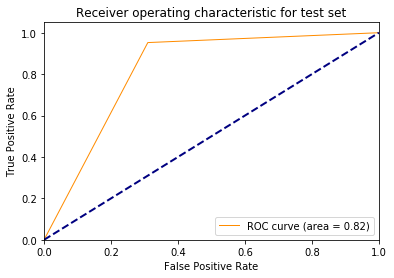

In [302]:
from sklearn.preprocessing import label_binarize

y_test = label_binarize(y_test, classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
test_pred = label_binarize(test_pred, classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

lw=2
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.show()

### iii). Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.
### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?


### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.
### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [671]:
from sklearn.metrics import pairwise_distances_argmin

mean_accuracy_train = []
mean_precision_train = []
mean_recall_train = []
mean_Fscore_train = []
mean_AUC_train = []

for i in range(0,30):
    test_data = pd.DataFrame()
    test_data_B = csv_data.loc[csv_data['class'] == 'B'].sample(frac=0.20)
    test_data_M = csv_data.loc[csv_data['class'] == 'M'].sample(frac=0.20)
    test_data = pd.concat([test_data, test_data_B, test_data_M], names=names)

    training_data = csv_data.loc[~csv_data.index.isin(test_data.index), :]

    training_data.reset_index(drop=True,inplace=True)
    test_data.reset_index(drop=True,inplace=True)


    test_data_main = test_data.drop(['id'], axis=1)
    training_data_main = training_data.drop(['id'], axis=1)


    test_data = test_data.drop(['class','id'], axis=1)
    training_data = training_data.drop(['class','id'], axis=1)
    kmeans = KMeans(n_clusters=2, random_state=i)
    clusters = kmeans.fit_predict(training_data)
    
    centroids = kmeans.cluster_centers_

    
    cluster0 = training_data[clusters == 0]
    cluster1 = training_data[clusters == 1]
    
    cluster_0_30_points = []
    cluster_1_30_points = []
    
    for i in range(0,30):
        min_distance_0 = pairwise_distances_argmin(centroids,np.array(cluster0))
        cluster_0_30_points.append(min_distance_0[0])
        cluster0 = cluster0.drop(cluster0.index[min_distance_0[0]])
        
        min_distance_1 = pairwise_distances_argmin(centroids,np.array(cluster1))
        cluster_1_30_points.append(min_distance_1[1])
        cluster1 = cluster1.drop(cluster1.index[min_distance_1[1]])
        
    cluster_0_30_dataframe_class = training_data_main.ix[cluster_0_30_points]
    cluster_1_30_dataframe_class = training_data_main.ix[cluster_1_30_points]
    
    cluster_0_30_dataframe = training_data.ix[cluster_0_30_points]
    cluster_1_30_dataframe = training_data.ix[cluster_1_30_points]

    cluster0 = pd.concat([cluster0,cluster_0_30_dataframe])
    cluster1 = pd.concat([cluster1,cluster_1_30_dataframe])

    class_cluster_0 = cluster_0_30_dataframe_class["class"].value_counts().keys()[0]
    class_cluster_1 = cluster_1_30_dataframe_class["class"].value_counts().keys()[0]

    cluster0["class"] = [class_cluster_0]*len(cluster0)
    cluster1["class"] = [class_cluster_1]*len(cluster1)

    new_train_data = pd.concat([cluster0,cluster1])

    mean_accuracy_train.append(accuracy_score(training_data_main["class"], new_train_data["class"]))

    #Precision
    mean_precision_train.append(precision_score(training_data_main["class"], new_train_data["class"],pos_label='B'))

    #Recall
    mean_recall_train.append(recall_score(training_data_main["class"], new_train_data["class"],pos_label='B'))

    #F-Score 
    mean_Fscore_train.append(f1_score(training_data_main["class"], new_train_data["class"],pos_label='B'))
    
    # AUC
    y_true_train_data = label_binarize(new_train_data["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
    train_pred = label_binarize(training_data_main["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
    
    mean_AUC_train.append(auc(y_true_train_data, train_pred))

In [672]:
print("AVG TRAIN ACCURACY = " + str(np.mean(mean_accuracy_train)))
print("AVG TRAIN PRECISION = " + str(np.mean(mean_precision_train)))
print("AVG TRAIN RECALL = " + str(np.mean(mean_recall_train)))
print("AVG TRAIN F-SCORE = " + str(np.mean(mean_Fscore_train)))
print("AVG TRAIN AUC = " + str(np.mean(mean_AUC_train)))

AVG TRAIN ACCURACY = 0.5620614035087719
AVG TRAIN PRECISION = 0.6043461743216904
AVG TRAIN RECALL = 0.754079254079254
AVG TRAIN F-SCORE = 0.6705256573518852
AVG TRAIN AUC = 0.38333333333333336


In [673]:
confusion_matrix(training_data_main["class"], new_train_data["class"])

array([[241,  45],
       [103,  67]])

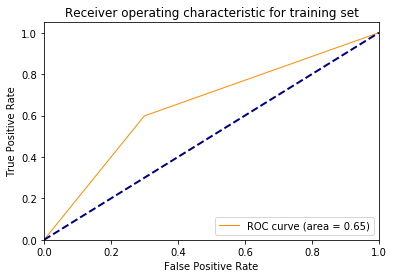

In [674]:
from sklearn.preprocessing import label_binarize

y_true_train_data = label_binarize(new_train_data["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
train_pred = label_binarize(training_data_main["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

lw=2
fpr, tpr, thresholds = roc_curve(y_true_train_data, train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training set')
plt.legend(loc="lower right")
plt.show()

In [715]:
from sklearn.metrics import pairwise_distances_argmin

mean_accuracy_test = []
mean_precision_test = []
mean_recall_test = []
mean_Fscore_test = []
mean_AUC_test = []

for i in range(0,30):
    test_data = pd.DataFrame()
    test_data_B = csv_data.loc[csv_data['class'] == 'B'].sample(frac=0.20)
    test_data_M = csv_data.loc[csv_data['class'] == 'M'].sample(frac=0.20)
    test_data = pd.concat([test_data, test_data_B, test_data_M], names=names)

    training_data = csv_data.loc[~csv_data.index.isin(test_data.index), :]

    training_data.reset_index(drop=True,inplace=True)
    test_data.reset_index(drop=True,inplace=True)


    test_data_main = test_data.drop(['id'], axis=1)
    training_data_main = training_data.drop(['id'], axis=1)

    test_data = test_data.drop(['class','id'], axis=1)
    training_data = training_data.drop(['class','id'], axis=1)


    kmeans = KMeans(n_clusters=2, random_state=i).fit(test_data)
    clusters = kmeans.predict(test_data)
    centroids = kmeans.cluster_centers_

    cluster0 = test_data[clusters == 0]
    cluster1 = test_data[clusters == 1]

    min_distance_0 = pairwise_distances_argmin(centroids,np.array(cluster0))
    cluster_0_min_point = min_distance_0[0]

    min_distance_1 = pairwise_distances_argmin(centroids,np.array(cluster1))
    cluster_1_min_point = min_distance_1[1]

    cluster_0_min_dataframe = test_data_main.ix[[cluster_0_min_point]]
    cluster_1_min_dataframe = test_data_main.ix[[cluster_1_min_point]]

    class_cluster_0 = cluster_0_min_dataframe["class"].values[0]
    class_cluster_1 = cluster_1_min_dataframe["class"].values[0]

    cluster0["class"] = [class_cluster_0]*len(cluster0)
    cluster1["class"] = [class_cluster_1]*len(cluster1)

    new_test_data = pd.concat([cluster0,cluster1])


    mean_accuracy_test.append(accuracy_score(test_data_main["class"], new_test_data["class"]))

    #Precision
    mean_precision_test.append(precision_score(test_data_main["class"], new_test_data["class"],pos_label='B'))

    #Recall
    mean_recall_test.append(recall_score(test_data_main["class"], new_test_data["class"],pos_label='B'))

    #F-Score 
    mean_Fscore_test.append(f1_score(test_data_main["class"], new_test_data["class"],pos_label='B'))

    # AUC
    y_true_test_data = label_binarize(test_data_main["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
    test_pred = label_binarize(new_test_data["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

    mean_AUC_test.append(auc(y_true_test_data, test_pred))

In [716]:
print("AVG TEST ACCURACY = " + str(np.mean(mean_accuracy_test)))
print("AVG TEST PRECISION = " + str(np.mean(mean_precision_test)))
print("AVG TEST RECALL = " + str(np.mean(mean_recall_test)))
print("AVG TEST F-SCORE = " + str(np.mean(mean_Fscore_test)))
print("AVG TEST AUC = " + str(np.mean(mean_AUC_test)))

AVG TEST ACCURACY = 0.6144542772861358
AVG TEST PRECISION = 0.6073746312684367
AVG TEST RECALL = 0.9666666666666667
AVG TEST F-SCORE = 0.746014492753623
AVG TEST AUC = 0.03333333333333333


In [603]:
confusion_matrix(test_data_main["class"], new_test_data["class"])

array([[71,  0],
       [42,  0]])

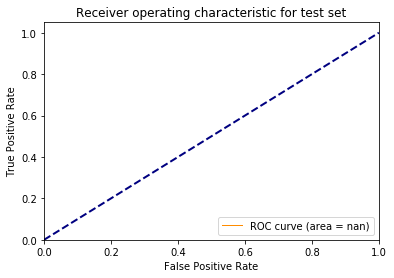

In [604]:
y_true_test_data = label_binarize(new_test_data["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
test_pred = label_binarize(test_data_main["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

lw=2
fpr, tpr, thresholds = roc_curve(y_true_test_data, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.show()

We are running K-Means for few times, this could allow K-Means not to get trapped in local minimum.

### iv). Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel.

In [704]:
from sklearn.metrics import pairwise_distances_argmin
import random

mean_accuracy_train = []
mean_precision_train = []
mean_recall_train = []
mean_Fscore_train = []
mean_AUC_train = []

for i in range(0,30):
    test_data = pd.DataFrame()
    test_data_B = csv_data.loc[csv_data['class'] == 'B'].sample(frac=0.20)
    test_data_M = csv_data.loc[csv_data['class'] == 'M'].sample(frac=0.20)
    test_data = pd.concat([test_data, test_data_B, test_data_M], names=names)

    training_data = csv_data.loc[~csv_data.index.isin(test_data.index), :]

    training_data.reset_index(drop=True,inplace=True)
    test_data.reset_index(drop=True,inplace=True)


    test_data_main = test_data.drop(['id'], axis=1)
    training_data_main = training_data.drop(['id'], axis=1)


    test_data = test_data.drop(['class'], axis=1)
    training_data = training_data.drop(['class'], axis=1)
    sc = SpectralClustering(n_clusters=2,affinity='rbf',n_init=5,random_state=random.randint(0,100)).fit(training_data)
    clusters = sc.labels_
            
    cluster0 = training_data[clusters == 0]
    cluster1 = training_data[clusters == 1]
    
    centroids = []
    center0_centroid = []
    center1_centroid = []
    for col in cluster0.columns:
        center0_centroid.append(np.mean(cluster0[col]))
        
    for col in cluster1.columns:
        center1_centroid.append(np.mean(cluster1[col]))
        
    centroids.append(center0_centroid)
    centroids.append(center1_centroid)
    cluster_0_30_points = []
    cluster_1_30_points = []
    
    for i in range(0,30):
        if len(cluster0)>0:
            min_distance_0 = pairwise_distances_argmin(centroids,np.array(cluster0))
            cluster_0_30_points.append(min_distance_0[0])
            cluster0 = cluster0.drop(cluster0.index[min_distance_0[0]])
        if len(cluster1)>0:
            min_distance_1 = pairwise_distances_argmin(centroids,np.array(cluster1))
            cluster_1_30_points.append(min_distance_1[1])
            cluster1 = cluster1.drop(cluster1.index[min_distance_1[1]])

    cluster_0_30_dataframe_class = training_data_main.ix[cluster_0_30_points]
    cluster_1_30_dataframe_class = training_data_main.ix[cluster_1_30_points]

    cluster_0_30_dataframe = training_data_main.ix[cluster_0_30_points]
    cluster_1_30_dataframe = training_data_main.ix[cluster_1_30_points]
    
    cluster0 = pd.concat([cluster0,cluster_0_30_dataframe])
    cluster1 = pd.concat([cluster1,cluster_1_30_dataframe])

    class_cluster_0 = cluster_0_30_dataframe_class["class"].value_counts().keys()[0]
    class_cluster_1 = cluster_1_30_dataframe_class["class"].value_counts().keys()[0]

    cluster0["class"] = [class_cluster_0]*len(cluster0)
    cluster1["class"] = [class_cluster_1]*len(cluster1)

    new_train_data = pd.concat([cluster0,cluster1])

    mean_accuracy_train.append(accuracy_score(training_data_main["class"], new_train_data["class"]))

    #Precision
    mean_precision_train.append(precision_score(training_data_main["class"], new_train_data["class"],pos_label='B'))

    #Recall
    mean_recall_train.append(recall_score(training_data_main["class"], new_train_data["class"],pos_label='B'))

    #F-Score 
    mean_Fscore_train.append(f1_score(training_data_main["class"], new_train_data["class"],pos_label='B'))
    
    # AUC
    y_true_train_data = label_binarize(new_train_data["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
    train_pred = label_binarize(training_data_main["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
    
    mean_AUC_train.append(auc(y_true_train_data, train_pred))

In [705]:
print("AVG TRAIN ACCURACY = " + str(np.mean(mean_accuracy_train)))
print("AVG TRAIN PRECISION = " + str(np.mean(mean_precision_train)))
print("AVG TRAIN RECALL = " + str(np.mean(mean_recall_train)))
print("AVG TRAIN F-SCORE = " + str(np.mean(mean_Fscore_train)))
print("AVG TRAIN AUC = " + str(np.mean(mean_AUC_train)))

AVG TRAIN ACCURACY = 0.6279239766081871
AVG TRAIN PRECISION = 0.6281017337764383
AVG TRAIN RECALL = 0.9972027972027971
AVG TRAIN F-SCORE = 0.7707413613073989
AVG TRAIN AUC = 0.9666666666666667


In [706]:
confusion_matrix(training_data_main["class"], new_train_data["class"])

array([[285,   1],
       [169,   1]])

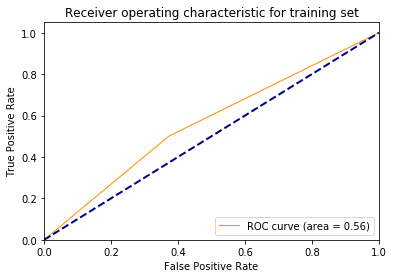

In [707]:
from sklearn.preprocessing import label_binarize

y_true_train_data = label_binarize(new_train_data["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
train_pred = label_binarize(training_data_main["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

lw=2
fpr, tpr, thresholds = roc_curve(y_true_train_data, train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training set')
plt.legend(loc="lower right")
plt.show()

In [717]:
from sklearn.metrics import pairwise_distances_argmin

mean_accuracy_test = []
mean_precision_test = []
mean_recall_test = []
mean_Fscore_test = []
mean_AUC_test = []

for i in range(0,30):
    test_data = pd.DataFrame()
    test_data_B = csv_data.loc[csv_data['class'] == 'B'].sample(frac=0.20)
    test_data_M = csv_data.loc[csv_data['class'] == 'M'].sample(frac=0.20)
    test_data = pd.concat([test_data, test_data_B, test_data_M], names=names)

    training_data = csv_data.loc[~csv_data.index.isin(test_data.index), :]
    
    
    training_data.reset_index(drop=True,inplace=True)
    test_data.reset_index(drop=True,inplace=True)


    test_data_main = test_data.drop(['id'], axis=1)
    training_data_main = training_data.drop(['id'], axis=1)

    test_data = test_data.drop(['class'], axis=1)
    training_data = training_data.drop(['class'], axis=1)


    sc = SpectralClustering(n_clusters=2,affinity='rbf',n_init=5,random_state=random.randint(0,100)).fit(test_data)
    clusters = sc.labels_

    cluster0 = test_data[clusters == 0]
    cluster1 = test_data[clusters == 1]

    
    centroids = []
    center0_centroid = []
    center1_centroid = []
    for col in cluster0.columns:
        center0_centroid.append(np.mean(cluster0[col]))
        
    for col in cluster1.columns:
        center1_centroid.append(np.mean(cluster1[col]))
        
    centroids.append(center0_centroid)
    centroids.append(center1_centroid)
    
    
    min_distance_0 = pairwise_distances_argmin(centroids,np.array(cluster0))
    cluster_0_min_point = min_distance_0[0]

    min_distance_1 = pairwise_distances_argmin(centroids,np.array(cluster1))
    cluster_1_min_point = min_distance_1[1]

    cluster_0_min_dataframe = test_data_main.ix[[cluster_0_min_point]]
    cluster_1_min_dataframe = test_data_main.ix[[cluster_1_min_point]]

    class_cluster_0 = cluster_0_min_dataframe["class"].values[0]
    class_cluster_1 = cluster_1_min_dataframe["class"].values[0]

    cluster0["class"] = [class_cluster_0]*len(cluster0)
    cluster1["class"] = [class_cluster_1]*len(cluster1)

    new_test_data = pd.concat([cluster0,cluster1])


    mean_accuracy_test.append(accuracy_score(test_data_main["class"], new_test_data["class"]))

    #Precision
    mean_precision_test.append(precision_score(test_data_main["class"], new_test_data["class"],pos_label='B'))

    #Recall
    mean_recall_test.append(recall_score(test_data_main["class"], new_test_data["class"],pos_label='B'))

    #F-Score 
    mean_Fscore_test.append(f1_score(test_data_main["class"], new_test_data["class"],pos_label='B'))

    # AUC
    y_true_test_data = label_binarize(test_data_main["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
    test_pred = label_binarize(new_test_data["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

    mean_AUC_test.append(auc(y_true_test_data, test_pred))

In [718]:
print("AVG TEST ACCURACY = " + str(np.mean(mean_accuracy_test)))
print("AVG TEST PRECISION = " + str(np.mean(mean_precision_test)))
print("AVG TEST RECALL = " + str(np.mean(mean_recall_test)))
print("AVG TEST F-SCORE = " + str(np.mean(mean_Fscore_test)))
print("AVG TEST AUC = " + str(np.mean(mean_AUC_test)))

AVG TEST ACCURACY = 0.6100294985250739
AVG TEST PRECISION = 0.5864306784660768
AVG TEST RECALL = 0.9333333333333333
AVG TEST F-SCORE = 0.7202898550724636
AVG TEST AUC = 0.06666666666666667


In [712]:
confusion_matrix(test_data_main["class"], new_test_data["class"])

array([[71,  0],
       [42,  0]])

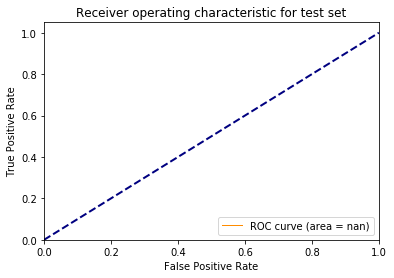

In [713]:
y_true_test_data = label_binarize(new_test_data["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)
test_pred = label_binarize(test_data_main["class"], classes=['B','M'], neg_label=0, pos_label=1, sparse_output=False)

lw=2
fpr, tpr, thresholds = roc_curve(y_true_test_data, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.show()

### v). One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

The AVG TEST ACCURACY for supervised learning is 0.6283185840707967, the AVG TEST ACCURACY for semi-supervised learning is 0.8185840707964601 and for unsupervised learning AVG TEST ACCURACY is 0.6144542772861358. Based on these values one can expects that semi-supervised learning with half of the data set labeled performs better.

# 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [124]:
names = ["variance", "skewness", "curtosis", "entropy", "class"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
csv_data = pd.read_csv(url, names=names)
csv_data

,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [125]:
test_data = pd.DataFrame()
test_data_0 = csv_data.loc[csv_data['class'] == 0].sample(n=236)
test_data_1 = csv_data.loc[csv_data['class'] == 1].sample(n=236)
test_data = pd.concat([test_data, test_data_0, test_data_1], names=names)

training_data = csv_data.loc[~csv_data.index.isin(test_data.index), :]

training_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

test_data

,class,curtosis,entropy,skewness,variance
0,0.0,-4.117400,-4.279700,10.538800,5.241800
1,0.0,-3.613600,-4.081900,11.219600,4.160500
2,0.0,2.013300,-0.872420,6.507900,0.184800
3,0.0,-2.432000,-0.983630,6.402300,3.883200
4,0.0,1.279800,-2.456500,7.190700,0.967880
5,0.0,4.908500,0.549980,2.325900,0.680870
6,0.0,-0.196510,-2.188800,8.035000,1.270600
7,0.0,-1.160500,-1.237100,6.149900,2.549000
8,0.0,2.643900,-4.837000,10.822300,-2.075900
9,0.0,0.121380,1.143500,0.138630,5.275600


In [71]:
y_training = training_data[["class"]]
x_training = training_data.drop(["class"],axis=1)

y_test = test_data[["class"]]
x_test = test_data.drop(["class"],axis=1)

### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### i). Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.2 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [73]:
c_r = np.logspace(-4,4,9)

param_grid = dict(C=c_r)

kf = KFold(n_splits=10)

monte_carlo_errors = {}
for i in range(0,50):
    temp_trainig_data = training_data
    new_data = pd.DataFrame()
    errors = []
    for j in range(0,90):
        
#         tempArray_0=temp_trainig_data.loc[temp_trainig_data['class'] == 0].sample(n=5)
#         tempArray_1=temp_trainig_data.loc[temp_trainig_data['class'] == 1].sample(n=5)
    
    
        ten_rows = temp_trainig_data.sample(n=10)
        
        new_data = pd.concat([new_data,ten_rows])
        
        temp_trainig_data = temp_trainig_data[~temp_trainig_data.index.isin(new_data.index)]

        y_train = new_data[["class"]]
        x_train = new_data.drop(["class"],axis=1)
        
        grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=param_grid, cv=kf)
        grid_search.fit(x_train,y_train)
        test_error = 1 - grid_search.score(x_test,y_test)
        errors.append(test_error)
    monte_carlo_errors[i] = errors

### ii). Train a SVM with a pool of 10 randomly selected data points from the training set3 using linear kernel and L1 penalty. Select the parameters of the SVM

In [109]:
c_r = np.logspace(-4,4,9)

param_grid = dict(C=c_r)

kf = KFold(n_splits=10)

monte_carlo_errors_active = {}

for i in range(0,50):
    temp_trainig_data = training_data
    new_data = pd.DataFrame()
    errors = []
        
#     ten_rows = temp_trainig_data.sample(n=10)

    tempArray_0 = temp_trainig_data.loc[temp_trainig_data['class'] == 0].sample(n=5)
    tempArray_1 = temp_trainig_data.loc[temp_trainig_data['class'] == 1].sample(n=5)
    print(i)
    for j in range(0,90):
        new_data=pd.concat([new_data,tempArray_0,tempArray_1])

        temp_trainig_data = temp_trainig_data[~temp_trainig_data.index.isin(new_data.index)]
        
        y_train = new_data[["class"]]
        x_train = new_data.drop(["class"],axis=1)
        
        grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=param_grid, cv=kf)
        grid_search.fit(x_train,y_train)
        
        test_error = 1- grid_search.score(x_test,y_test)
        errors.append(test_error)
        if j==89:
            continue
        y= grid_search.decision_function(temp_trainig_data.drop(["class"], axis=1))
        y=abs(y)
        x_loc=y.argsort()[:10]
       
        tempArray_0 = temp_trainig_data.iloc[x_loc,:]
        tempArray_1 = pd.DataFrame()
                                         
    monte_carlo_errors_active[i] = errors

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [107]:
passive_monte_carlo = [0]*90
for key,val in monte_carlo_errors.items():
    for i in range(0,90):
        passive_monte_carlo[i]+= val[i]
passive_average = [i/50 for i in passive_monte_carlo]

In [111]:
active_monte_carlo = [0]*90
for key,val in monte_carlo_errors_active.items():
    for i in range(0,90):
        active_monte_carlo[i]+= val[i]
active_average = [i/50 for i in active_monte_carlo]

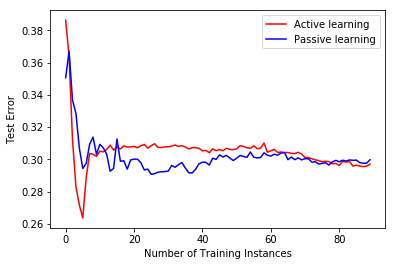

In [113]:
x = [i for i in range(0,90)]

plt.xlabel('Number of Training Instances')
plt.ylabel('Test Error')
plt.plot(x, active_average, 'red', label="Active learning")
plt.plot(x, passive_average, 'blue', label="Passive learning")
plt.legend()
plt.show()

The test error average is greater in active learning as compared to passive learning.